In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle



In [3]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

test_split = 0.1 #portion of data used for testing
 #portion of training data used for validation
    
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 27)           837         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 27)           108         dense_1[0][0]                    
_____________________________________________________________________________________

Epoch 23/50
511766/511766 [==============================] - 95s 186us/step - loss: 0.1587 - accuracy: 0.9371 - val_loss: 0.1095 - val_accuracy: 0.9883
Epoch 46/50
511766/511766 [==============================] - 95s 185us/step - loss: 0.1589 - accuracy: 0.9370 - val_loss: 0.1127 - val_accuracy: 0.9873
Epoch 47/50
511766/511766 [==============================] - 96s 187us/step - loss: 0.1587 - accuracy: 0.9373 - val_loss: 0.1200 - val_accuracy: 0.9844
Epoch 48/50
511766/511766 [==============================] - 95s 187us/step - loss: 0.1588 - accuracy: 0.9371 - val_loss: 0.1154 - val_accuracy: 0.9848
Epoch 49/50
511766/511766 [==============================] - 95s 185us/step - loss: 0.1585 - accuracy: 0.9374 - val_loss: 0.1139 - val_accuracy: 0.9844
Epoch 50/50
511766/511766 [==============================] - 95s 185us/step - loss: 0.1584 - accuracy: 0.9373 - val_loss: 0.1099 - val_accuracy: 0.9871


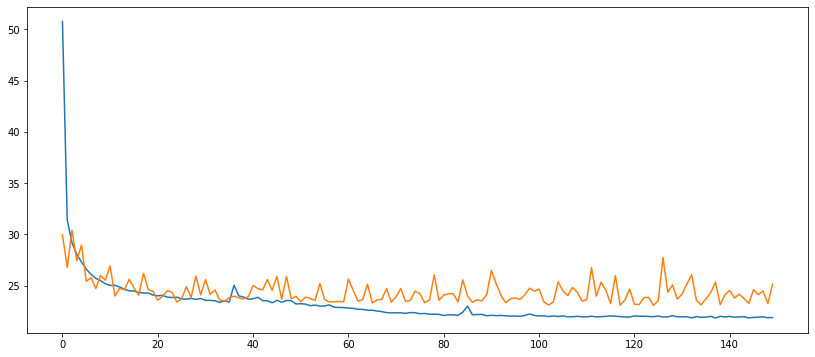

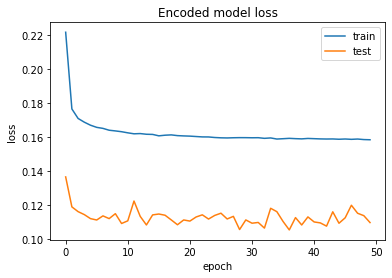

Overall accuracy of Convolutional Neural Network model: 0.9870791053684913


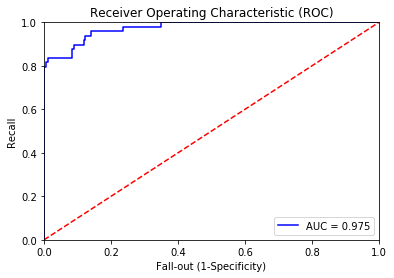

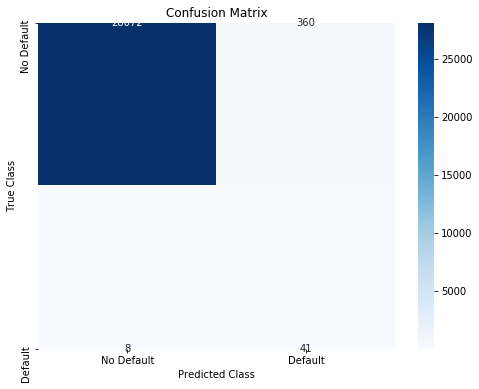

AUC(ROC): 0.9120364521723152
Precision: 0.10224438902743142
Recall: 0.8367346938775511
F1 score: 0.18222222222222223
False positives: 360
True positives: 41
False negatives: 8
True negatives: 28072
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 27)           837         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 27)           108         dense_10[0][0]                   
_____________________________________________________________________________________

Epoch 58/150
511766/511766 [==============================] - 26s 50us/step - loss: 14.0775 - rec_loss: 22.3222 - kl_loss: 4.6944 - val_loss: 13.7600 - val_rec_loss: 23.8402 - val_kl_loss: 3.1390
Epoch 59/150
511766/511766 [==============================] - 26s 50us/step - loss: 14.0210 - rec_loss: 22.2008 - kl_loss: 4.7044 - val_loss: 13.5826 - val_rec_loss: 23.5089 - val_kl_loss: 3.1111
Epoch 60/150
511766/511766 [==============================] - 25s 49us/step - loss: 14.0045 - rec_loss: 22.1694 - kl_loss: 4.7084 - val_loss: 13.0168 - val_rec_loss: 22.4880 - val_kl_loss: 3.0140
Epoch 61/150
511766/511766 [==============================] - 26s 51us/step - loss: 14.1476 - rec_loss: 22.4578 - kl_loss: 4.7083 - val_loss: 13.1294 - val_rec_loss: 22.5122 - val_kl_loss: 3.2123
Epoch 62/150
511766/511766 [==============================] - 26s 51us/step - loss: 13.9984 - rec_loss: 22.1653 - kl_loss: 4.7043 - val_loss: 13.2239 - val_rec_loss: 22.7509 - val_kl_loss: 3.1479
Epoch 63/150
511766/

Epoch 100/150
511766/511766 [==============================] - 26s 51us/step - loss: 14.3114 - rec_loss: 22.7931 - kl_loss: 4.7469 - val_loss: 13.2473 - val_rec_loss: 22.8271 - val_kl_loss: 3.1613
Epoch 101/150
511766/511766 [==============================] - 26s 51us/step - loss: 14.1955 - rec_loss: 22.5284 - kl_loss: 4.7483 - val_loss: 13.2342 - val_rec_loss: 22.7914 - val_kl_loss: 3.1689
Epoch 102/150
511766/511766 [==============================] - 26s 51us/step - loss: 14.1796 - rec_loss: 22.4980 - kl_loss: 4.7435 - val_loss: 13.8622 - val_rec_loss: 24.1208 - val_kl_loss: 3.0866
Epoch 103/150
511766/511766 [==============================] - 26s 51us/step - loss: 14.1181 - rec_loss: 22.3846 - kl_loss: 4.7439 - val_loss: 13.3412 - val_rec_loss: 23.0532 - val_kl_loss: 3.1264
Epoch 104/150
511766/511766 [==============================] - 26s 51us/step - loss: 14.1405 - rec_loss: 22.4386 - kl_loss: 4.7330 - val_loss: 13.1179 - val_rec_loss: 22.6710 - val_kl_loss: 3.0696
Epoch 105/150
5

Epoch 42/50
511766/511766 [==============================] - 95s 186us/step - loss: 0.1729 - accuracy: 0.9343 - val_loss: 0.1169 - val_accuracy: 0.9838
Epoch 43/50
511766/511766 [==============================] - 93s 182us/step - loss: 0.1726 - accuracy: 0.9343 - val_loss: 0.1221 - val_accuracy: 0.9835
Epoch 44/50
511766/511766 [==============================] - 92s 181us/step - loss: 0.1728 - accuracy: 0.9345 - val_loss: 0.1183 - val_accuracy: 0.9851
Epoch 45/50
511766/511766 [==============================] - 94s 183us/step - loss: 0.1725 - accuracy: 0.9347 - val_loss: 0.1242 - val_accuracy: 0.9828
Epoch 46/50
511766/511766 [==============================] - 95s 186us/step - loss: 0.1726 - accuracy: 0.9345 - val_loss: 0.1180 - val_accuracy: 0.9816
Epoch 47/50
511766/511766 [==============================] - 95s 186us/step - loss: 0.1723 - accuracy: 0.9344 - val_loss: 0.1196 - val_accuracy: 0.9835
Epoch 48/50
511766/511766 [==============================] - 95s 185us/step - loss: 0.17

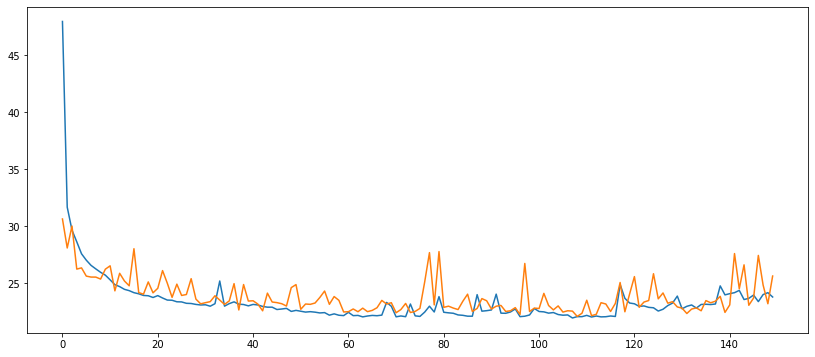

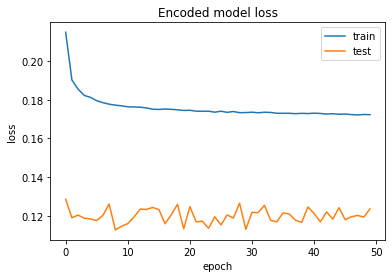

Overall accuracy of Convolutional Neural Network model: 0.9831115480495769


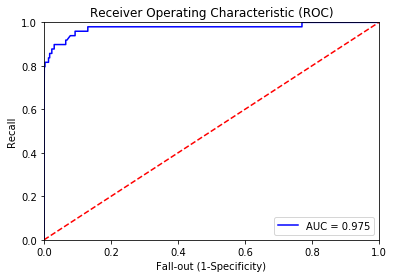

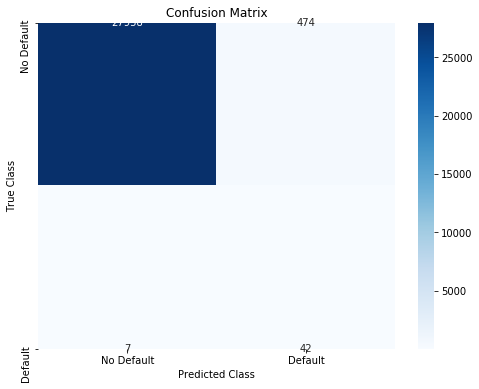

AUC(ROC): 0.9202357504622558
Precision: 0.08139534883720931
Recall: 0.8571428571428571
F1 score: 0.1486725663716814
False positives: 474
True positives: 42
False negatives: 7
True negatives: 27958
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 27)           837         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_23 (BatchNo (None, 27)           108         dense_19[0][0]                   
_____________________________________________________________________________________

Epoch 58/150
511766/511766 [==============================] - 26s 51us/step - loss: 14.1780 - rec_loss: 22.7160 - kl_loss: 4.5314 - val_loss: 13.2109 - val_rec_loss: 23.1491 - val_kl_loss: 2.7929
Epoch 59/150
511766/511766 [==============================] - 26s 51us/step - loss: 14.2033 - rec_loss: 22.7547 - kl_loss: 4.5334 - val_loss: 13.8150 - val_rec_loss: 24.1477 - val_kl_loss: 2.9887
Epoch 60/150
511766/511766 [==============================] - 26s 51us/step - loss: 14.1750 - rec_loss: 22.6950 - kl_loss: 4.5402 - val_loss: 13.7348 - val_rec_loss: 23.9654 - val_kl_loss: 3.0223
Epoch 61/150
511766/511766 [==============================] - 26s 51us/step - loss: 14.2064 - rec_loss: 22.7554 - kl_loss: 4.5401 - val_loss: 13.0285 - val_rec_loss: 22.6092 - val_kl_loss: 2.9634
Epoch 62/150
511766/511766 [==============================] - 26s 51us/step - loss: 14.1861 - rec_loss: 22.7092 - kl_loss: 4.5396 - val_loss: 13.4967 - val_rec_loss: 23.6666 - val_kl_loss: 2.8327
Epoch 63/150
511766/

Epoch 100/150
511766/511766 [==============================] - 26s 51us/step - loss: 14.0888 - rec_loss: 22.5500 - kl_loss: 4.5428 - val_loss: 14.5160 - val_rec_loss: 25.6383 - val_kl_loss: 2.9305
Epoch 101/150
511766/511766 [==============================] - 26s 51us/step - loss: 14.1014 - rec_loss: 22.5756 - kl_loss: 4.5437 - val_loss: 15.7646 - val_rec_loss: 28.3393 - val_kl_loss: 2.7132
Epoch 102/150
511766/511766 [==============================] - 26s 51us/step - loss: 14.0827 - rec_loss: 22.5201 - kl_loss: 4.5477 - val_loss: 13.3479 - val_rec_loss: 23.5206 - val_kl_loss: 2.6967
Epoch 103/150
511766/511766 [==============================] - 26s 51us/step - loss: 14.0487 - rec_loss: 22.4640 - kl_loss: 4.5444 - val_loss: 13.6094 - val_rec_loss: 23.8763 - val_kl_loss: 2.8778
Epoch 104/150
511766/511766 [==============================] - 26s 51us/step - loss: 14.1123 - rec_loss: 22.5889 - kl_loss: 4.5487 - val_loss: 13.7817 - val_rec_loss: 24.3112 - val_kl_loss: 2.7745
Epoch 105/150
5

Epoch 42/50
511766/511766 [==============================] - 97s 190us/step - loss: 0.1796 - accuracy: 0.9298 - val_loss: 0.1164 - val_accuracy: 0.9795
Epoch 43/50
511766/511766 [==============================] - 98s 191us/step - loss: 0.1794 - accuracy: 0.9295 - val_loss: 0.1234 - val_accuracy: 0.9760
Epoch 44/50
511766/511766 [==============================] - 96s 188us/step - loss: 0.1796 - accuracy: 0.9296 - val_loss: 0.1329 - val_accuracy: 0.9768
Epoch 45/50
511766/511766 [==============================] - 93s 182us/step - loss: 0.1792 - accuracy: 0.9298 - val_loss: 0.1212 - val_accuracy: 0.9752
Epoch 46/50
511766/511766 [==============================] - 96s 188us/step - loss: 0.1791 - accuracy: 0.9299 - val_loss: 0.1227 - val_accuracy: 0.9732
Epoch 47/50
511766/511766 [==============================] - 98s 191us/step - loss: 0.1790 - accuracy: 0.9296 - val_loss: 0.1240 - val_accuracy: 0.9747
Epoch 48/50
511766/511766 [==============================] - 98s 191us/step - loss: 0.17

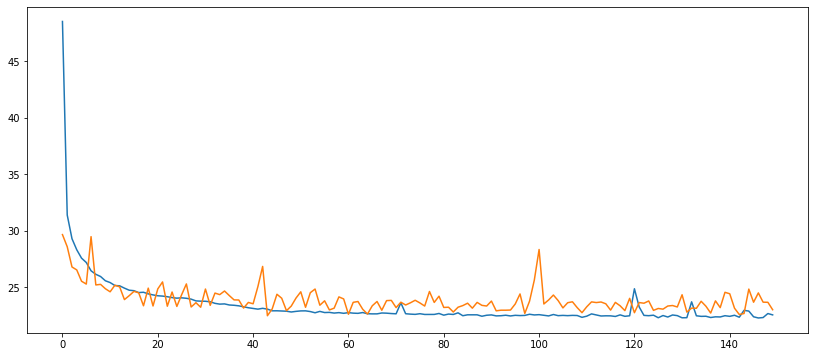

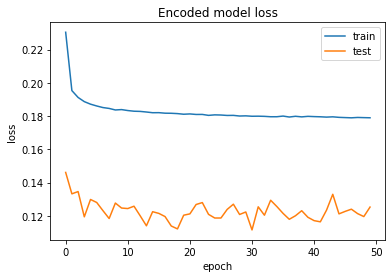

Overall accuracy of Convolutional Neural Network model: 0.9745093220041431


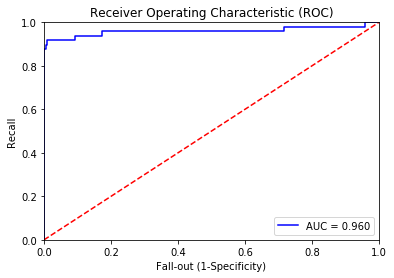

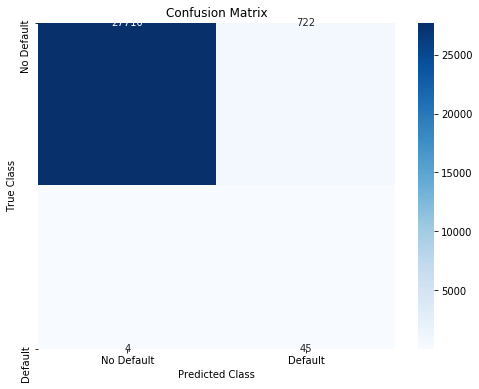

AUC(ROC): 0.9464867122988756
Precision: 0.05867014341590613
Recall: 0.9183673469387755
F1 score: 0.11029411764705882
False positives: 722
True positives: 45
False negatives: 4
True negatives: 27710
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 27)           837         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_34 (BatchNo (None, 27)           108         dense_28[0][0]                   
_____________________________________________________________________________________

Epoch 58/150
511766/511766 [==============================] - 27s 52us/step - loss: 14.2916 - rec_loss: 22.9533 - kl_loss: 4.5289 - val_loss: 13.4272 - val_rec_loss: 23.2247 - val_kl_loss: 3.1386
Epoch 59/150
511766/511766 [==============================] - 27s 52us/step - loss: 14.4723 - rec_loss: 23.3012 - kl_loss: 4.5340 - val_loss: 13.4605 - val_rec_loss: 23.4380 - val_kl_loss: 3.0094
Epoch 60/150
511766/511766 [==============================] - 27s 52us/step - loss: 14.5109 - rec_loss: 23.3702 - kl_loss: 4.5450 - val_loss: 13.0295 - val_rec_loss: 22.7904 - val_kl_loss: 2.8184
Epoch 61/150
511766/511766 [==============================] - 27s 52us/step - loss: 14.3259 - rec_loss: 23.0072 - kl_loss: 4.5338 - val_loss: 13.0742 - val_rec_loss: 22.9027 - val_kl_loss: 2.8129
Epoch 62/150
511766/511766 [==============================] - 27s 52us/step - loss: 14.2996 - rec_loss: 22.9663 - kl_loss: 4.5309 - val_loss: 13.2040 - val_rec_loss: 23.1221 - val_kl_loss: 2.8437
Epoch 63/150
511766/

Epoch 100/150
511766/511766 [==============================] - 27s 52us/step - loss: 14.1366 - rec_loss: 22.7122 - kl_loss: 4.5523 - val_loss: 12.9222 - val_rec_loss: 22.6587 - val_kl_loss: 2.7720
Epoch 101/150
511766/511766 [==============================] - 27s 52us/step - loss: 14.5307 - rec_loss: 23.4896 - kl_loss: 4.5455 - val_loss: 13.2178 - val_rec_loss: 23.1634 - val_kl_loss: 2.8267
Epoch 102/150
511766/511766 [==============================] - 27s 52us/step - loss: 14.5555 - rec_loss: 23.4923 - kl_loss: 4.5569 - val_loss: 13.5705 - val_rec_loss: 24.0061 - val_kl_loss: 2.7141
Epoch 103/150
511766/511766 [==============================] - 27s 52us/step - loss: 14.0714 - rec_loss: 22.5871 - kl_loss: 4.5348 - val_loss: 13.3949 - val_rec_loss: 23.5868 - val_kl_loss: 2.8002
Epoch 104/150
511766/511766 [==============================] - 27s 52us/step - loss: 14.1019 - rec_loss: 22.6481 - kl_loss: 4.5365 - val_loss: 13.0054 - val_rec_loss: 22.9180 - val_kl_loss: 2.6907
Epoch 105/150
5

Epoch 42/50
511766/511766 [==============================] - 91s 179us/step - loss: 0.1835 - accuracy: 0.9323 - val_loss: 0.1302 - val_accuracy: 0.9821
Epoch 43/50
511766/511766 [==============================] - 95s 185us/step - loss: 0.1835 - accuracy: 0.9321 - val_loss: 0.1166 - val_accuracy: 0.9813
Epoch 44/50
511766/511766 [==============================] - 96s 188us/step - loss: 0.1837 - accuracy: 0.9320 - val_loss: 0.1186 - val_accuracy: 0.9823
Epoch 45/50
511766/511766 [==============================] - 96s 187us/step - loss: 0.1835 - accuracy: 0.9319 - val_loss: 0.1173 - val_accuracy: 0.9796
Epoch 46/50
511766/511766 [==============================] - 96s 188us/step - loss: 0.1833 - accuracy: 0.9323 - val_loss: 0.1142 - val_accuracy: 0.9833
Epoch 47/50
511766/511766 [==============================] - 96s 188us/step - loss: 0.1833 - accuracy: 0.9324 - val_loss: 0.1276 - val_accuracy: 0.9803
Epoch 48/50
511766/511766 [==============================] - 97s 189us/step - loss: 0.18

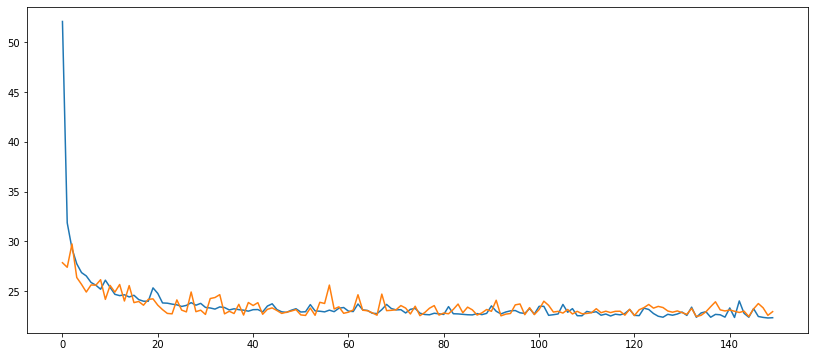

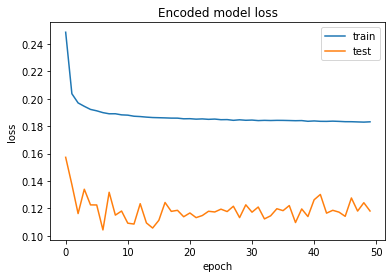

Overall accuracy of Convolutional Neural Network model: 0.9842351041044907


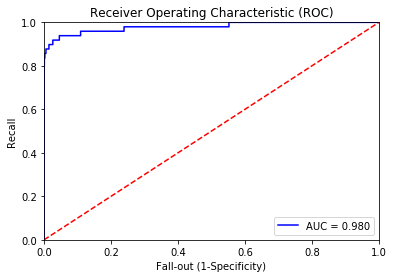

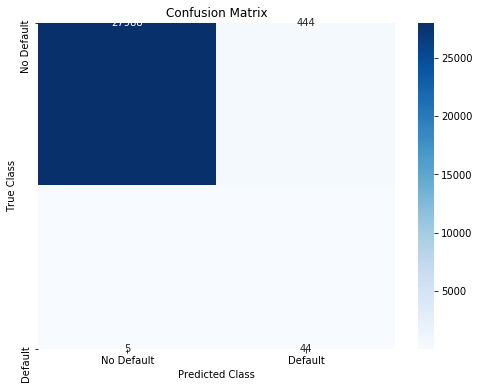

AUC(ROC): 0.9411714882914336
Precision: 0.09016393442622951
Recall: 0.8979591836734694
F1 score: 0.1638733705772812
False positives: 444
True positives: 44
False negatives: 5
True negatives: 27988
Fold #5
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_37 (Dense)                (None, 27)           837         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_45 (BatchNo (None, 27)           108         dense_37[0][0]                   
_____________________________________________________________________________________

Epoch 58/150
511766/511766 [==============================] - 26s 51us/step - loss: 14.3869 - rec_loss: 22.8573 - kl_loss: 4.6022 - val_loss: 13.6754 - val_rec_loss: 24.1131 - val_kl_loss: 2.6853
Epoch 59/150
511766/511766 [==============================] - 26s 51us/step - loss: 14.3618 - rec_loss: 22.8080 - kl_loss: 4.6008 - val_loss: 13.8163 - val_rec_loss: 24.1439 - val_kl_loss: 2.9555
Epoch 60/150
511766/511766 [==============================] - 26s 51us/step - loss: 14.4284 - rec_loss: 22.9261 - kl_loss: 4.6109 - val_loss: 13.6668 - val_rec_loss: 23.9834 - val_kl_loss: 2.8162
Epoch 61/150
511766/511766 [==============================] - 26s 51us/step - loss: 14.3414 - rec_loss: 22.7709 - kl_loss: 4.6045 - val_loss: 14.0809 - val_rec_loss: 24.7546 - val_kl_loss: 2.8827
Epoch 62/150
511766/511766 [==============================] - 26s 51us/step - loss: 14.3706 - rec_loss: 22.8237 - kl_loss: 4.6074 - val_loss: 13.4504 - val_rec_loss: 23.6098 - val_kl_loss: 2.7662
Epoch 63/150
511766/

Epoch 100/150
511766/511766 [==============================] - 26s 50us/step - loss: 15.0049 - rec_loss: 24.0700 - kl_loss: 4.6313 - val_loss: 14.6092 - val_rec_loss: 25.7146 - val_kl_loss: 2.8553
Epoch 101/150
511766/511766 [==============================] - 26s 50us/step - loss: 14.8810 - rec_loss: 23.8287 - kl_loss: 4.6283 - val_loss: 14.0733 - val_rec_loss: 24.7141 - val_kl_loss: 2.7973
Epoch 102/150
511766/511766 [==============================] - 26s 50us/step - loss: 15.0974 - rec_loss: 24.2649 - kl_loss: 4.6302 - val_loss: 13.4309 - val_rec_loss: 23.2013 - val_kl_loss: 3.0028
Epoch 103/150
511766/511766 [==============================] - 26s 50us/step - loss: 16.5079 - rec_loss: 26.9756 - kl_loss: 4.6847 - val_loss: 14.0595 - val_rec_loss: 24.5018 - val_kl_loss: 2.8896
Epoch 104/150
511766/511766 [==============================] - 26s 50us/step - loss: 19.7510 - rec_loss: 33.1579 - kl_loss: 4.7697 - val_loss: 13.8896 - val_rec_loss: 24.1620 - val_kl_loss: 2.7720
Epoch 105/150
5

Epoch 42/50
511766/511766 [==============================] - 96s 187us/step - loss: 0.1877 - accuracy: 0.9343 - val_loss: 0.1353 - val_accuracy: 0.9877
Epoch 43/50
511766/511766 [==============================] - 96s 187us/step - loss: 0.1876 - accuracy: 0.9342 - val_loss: 0.1319 - val_accuracy: 0.9879
Epoch 44/50
511766/511766 [==============================] - 96s 187us/step - loss: 0.1878 - accuracy: 0.9342 - val_loss: 0.1195 - val_accuracy: 0.9892
Epoch 45/50
511766/511766 [==============================] - 96s 187us/step - loss: 0.1878 - accuracy: 0.9343 - val_loss: 0.1238 - val_accuracy: 0.9894
Epoch 46/50
511766/511766 [==============================] - 96s 187us/step - loss: 0.1878 - accuracy: 0.9343 - val_loss: 0.1237 - val_accuracy: 0.9893
Epoch 47/50
511766/511766 [==============================] - 96s 187us/step - loss: 0.1879 - accuracy: 0.9341 - val_loss: 0.1331 - val_accuracy: 0.9884
Epoch 48/50
511766/511766 [==============================] - 94s 183us/step - loss: 0.18

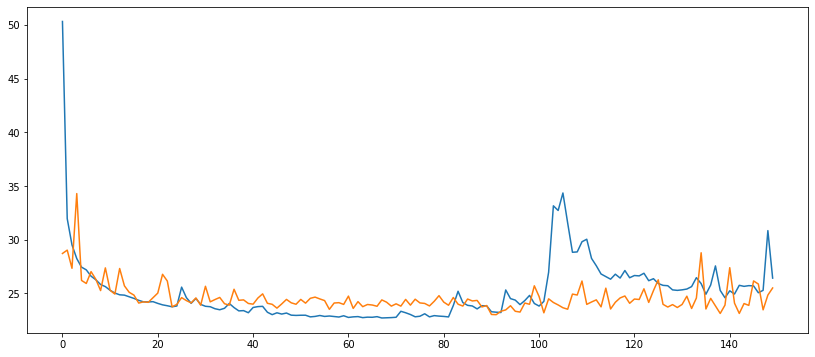

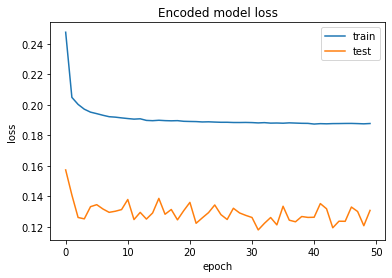

Overall accuracy of Convolutional Neural Network model: 0.9888346617042941


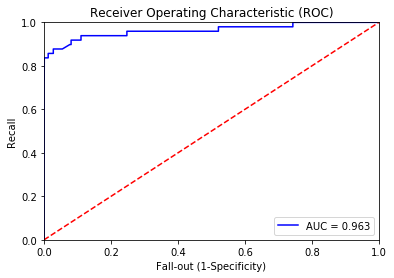

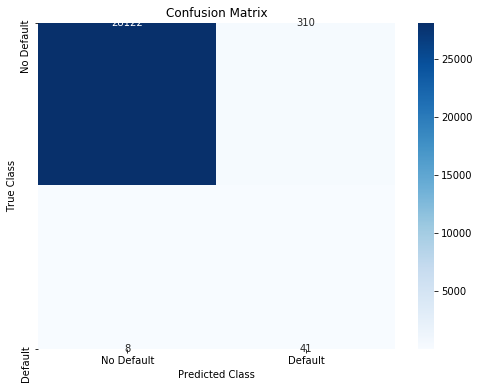

AUC(ROC): 0.9129157431121014
Precision: 0.1168091168091168
Recall: 0.8367346938775511
F1 score: 0.20500000000000002
False positives: 310
True positives: 41
False negatives: 8
True negatives: 28122
Fold #6
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_46 (Dense)                (None, 27)           837         input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_56 (BatchNo (None, 27)           108         dense_46[0][0]                   
____________________________________________________________________________________

Epoch 58/150
511768/511768 [==============================] - 26s 50us/step - loss: 14.8974 - rec_loss: 23.9034 - kl_loss: 4.7014 - val_loss: 12.9564 - val_rec_loss: 22.5398 - val_kl_loss: 2.8589
Epoch 59/150
511768/511768 [==============================] - 25s 49us/step - loss: 14.7664 - rec_loss: 23.6688 - kl_loss: 4.6837 - val_loss: 12.8118 - val_rec_loss: 22.1385 - val_kl_loss: 2.9621
Epoch 60/150
511768/511768 [==============================] - 25s 49us/step - loss: 14.6826 - rec_loss: 23.5208 - kl_loss: 4.6776 - val_loss: 13.3379 - val_rec_loss: 23.2871 - val_kl_loss: 2.8934
Epoch 61/150
511768/511768 [==============================] - 25s 49us/step - loss: 14.6298 - rec_loss: 23.4163 - kl_loss: 4.6842 - val_loss: 13.2969 - val_rec_loss: 23.2133 - val_kl_loss: 2.8622
Epoch 62/150
511768/511768 [==============================] - 25s 49us/step - loss: 14.7648 - rec_loss: 23.6663 - kl_loss: 4.6990 - val_loss: 12.8120 - val_rec_loss: 22.2177 - val_kl_loss: 2.8820
Epoch 63/150
511768/

Epoch 100/150
511768/511768 [==============================] - 25s 49us/step - loss: 14.7498 - rec_loss: 23.3652 - kl_loss: 4.8494 - val_loss: 13.5595 - val_rec_loss: 23.2588 - val_kl_loss: 3.1764
Epoch 101/150
511768/511768 [==============================] - 25s 49us/step - loss: 14.7736 - rec_loss: 23.4068 - kl_loss: 4.8453 - val_loss: 13.7371 - val_rec_loss: 23.7424 - val_kl_loss: 3.0411
Epoch 102/150
511768/511768 [==============================] - 25s 49us/step - loss: 14.8120 - rec_loss: 23.4641 - kl_loss: 4.8512 - val_loss: 13.1272 - val_rec_loss: 22.5691 - val_kl_loss: 3.0017
Epoch 103/150
511768/511768 [==============================] - 25s 49us/step - loss: 14.8644 - rec_loss: 23.5765 - kl_loss: 4.8443 - val_loss: 13.3009 - val_rec_loss: 22.8616 - val_kl_loss: 3.0612
Epoch 104/150
511768/511768 [==============================] - 25s 49us/step - loss: 14.8368 - rec_loss: 23.5255 - kl_loss: 4.8378 - val_loss: 13.3616 - val_rec_loss: 23.1319 - val_kl_loss: 2.8941
Epoch 105/150
5

Epoch 42/50
511768/511768 [==============================] - 93s 181us/step - loss: 0.2013 - accuracy: 0.9248 - val_loss: 0.1436 - val_accuracy: 0.9716
Epoch 43/50
511768/511768 [==============================] - 99s 193us/step - loss: 0.2014 - accuracy: 0.9248 - val_loss: 0.1367 - val_accuracy: 0.9755
Epoch 44/50
511768/511768 [==============================] - 95s 186us/step - loss: 0.2009 - accuracy: 0.9249 - val_loss: 0.1478 - val_accuracy: 0.9742
Epoch 45/50
511768/511768 [==============================] - 95s 185us/step - loss: 0.2010 - accuracy: 0.9252 - val_loss: 0.1455 - val_accuracy: 0.9719
Epoch 46/50
511768/511768 [==============================] - 95s 185us/step - loss: 0.2012 - accuracy: 0.9251 - val_loss: 0.1295 - val_accuracy: 0.9747
Epoch 47/50
511768/511768 [==============================] - 95s 185us/step - loss: 0.2014 - accuracy: 0.9251 - val_loss: 0.1343 - val_accuracy: 0.9750
Epoch 48/50
511768/511768 [==============================] - 95s 185us/step - loss: 0.20

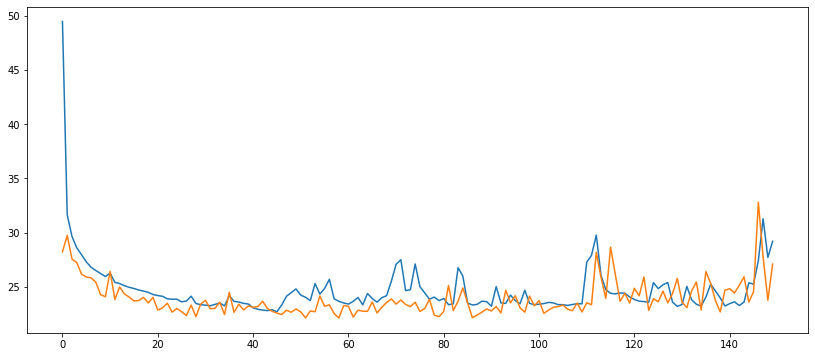

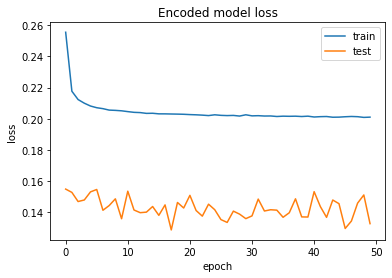

Overall accuracy of Convolutional Neural Network model: 0.9764053228468101


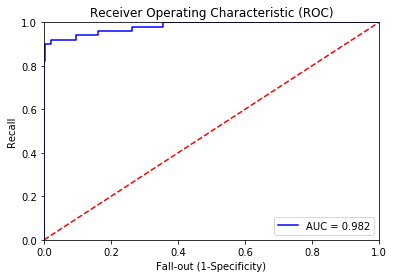

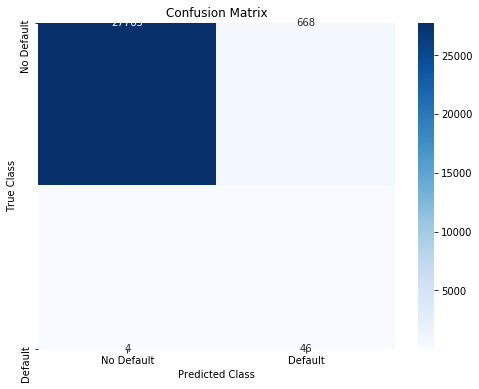

AUC(ROC): 0.9482522598571981
Precision: 0.06442577030812324
Recall: 0.92
F1 score: 0.12041884816753926
False positives: 668
True positives: 46
False negatives: 4
True negatives: 27763
Fold #7
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_55 (Dense)                (None, 27)           837         input_13[0][0]                   
__________________________________________________________________________________________________
batch_normalization_67 (BatchNo (None, 27)           108         dense_55[0][0]                   
____________________________________________________________________________________

Epoch 58/150
511768/511768 [==============================] - 25s 49us/step - loss: 14.8738 - rec_loss: 23.6532 - kl_loss: 4.7860 - val_loss: 12.8601 - val_rec_loss: 21.5804 - val_kl_loss: 3.5728
Epoch 59/150
511768/511768 [==============================] - 25s 49us/step - loss: 14.7444 - rec_loss: 23.3992 - kl_loss: 4.7902 - val_loss: 12.8436 - val_rec_loss: 21.7368 - val_kl_loss: 3.3845
Epoch 60/150
511768/511768 [==============================] - 27s 52us/step - loss: 14.8728 - rec_loss: 23.6589 - kl_loss: 4.7842 - val_loss: 13.1636 - val_rec_loss: 22.2940 - val_kl_loss: 3.4629
Epoch 61/150
511768/511768 [==============================] - 27s 52us/step - loss: 14.8460 - rec_loss: 23.5935 - kl_loss: 4.7974 - val_loss: 12.4711 - val_rec_loss: 21.1965 - val_kl_loss: 3.1746
Epoch 62/150
511768/511768 [==============================] - 26s 52us/step - loss: 14.8431 - rec_loss: 23.6064 - kl_loss: 4.7798 - val_loss: 12.9596 - val_rec_loss: 21.8831 - val_kl_loss: 3.4725
Epoch 63/150
511768/

Epoch 141/150
511768/511768 [==============================] - 27s 52us/step - loss: 14.3927 - rec_loss: 22.7073 - kl_loss: 4.8281 - val_loss: 14.6358 - val_rec_loss: 25.3446 - val_kl_loss: 3.3424
Epoch 142/150
511768/511768 [==============================] - 26s 51us/step - loss: 14.4591 - rec_loss: 22.8223 - kl_loss: 4.8434 - val_loss: 12.8451 - val_rec_loss: 21.6847 - val_kl_loss: 3.3986
Epoch 143/150
511768/511768 [==============================] - 26s 52us/step - loss: 14.6574 - rec_loss: 23.1482 - kl_loss: 4.8794 - val_loss: 13.3250 - val_rec_loss: 22.4974 - val_kl_loss: 3.5328
Epoch 144/150
511768/511768 [==============================] - 27s 52us/step - loss: 14.5663 - rec_loss: 22.9633 - kl_loss: 4.8819 - val_loss: 14.0228 - val_rec_loss: 23.9090 - val_kl_loss: 3.5239
Epoch 145/150
511768/511768 [==============================] - 26s 52us/step - loss: 14.4810 - rec_loss: 22.8138 - kl_loss: 4.8706 - val_loss: 13.7798 - val_rec_loss: 23.5387 - val_kl_loss: 3.4097
Epoch 146/150
5

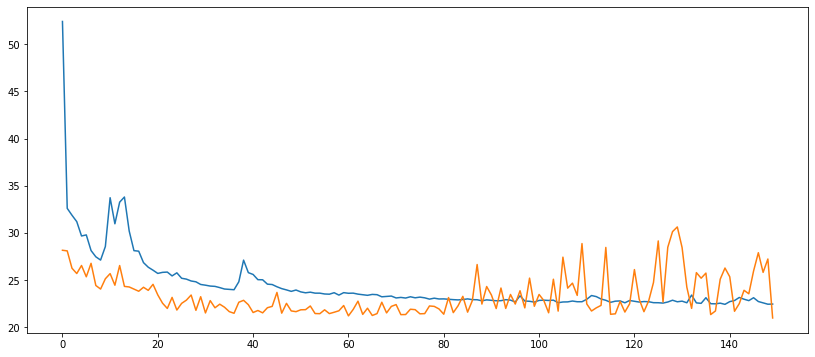

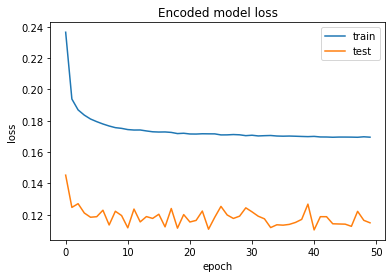

Overall accuracy of Convolutional Neural Network model: 0.9920648853621713


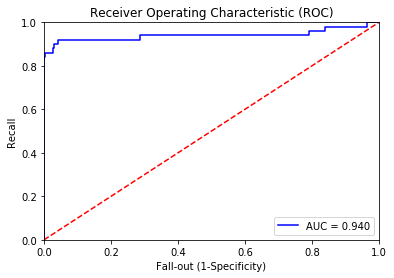

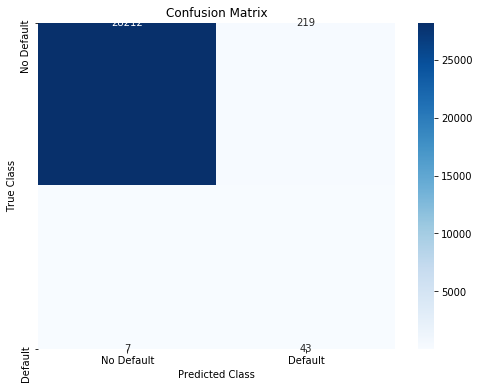

AUC(ROC): 0.9261485702226443
Precision: 0.16412213740458015
Recall: 0.86
F1 score: 0.2756410256410256
False positives: 219
True positives: 43
False negatives: 7
True negatives: 28212
Fold #8
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_64 (Dense)                (None, 27)           837         input_15[0][0]                   
__________________________________________________________________________________________________
batch_normalization_78 (BatchNo (None, 27)           108         dense_64[0][0]                   
____________________________________________________________________________________

Epoch 58/150
511768/511768 [==============================] - 25s 50us/step - loss: 14.1370 - rec_loss: 22.4156 - kl_loss: 4.6192 - val_loss: 13.7465 - val_rec_loss: 23.9705 - val_kl_loss: 3.0156
Epoch 59/150
511768/511768 [==============================] - 25s 50us/step - loss: 14.1080 - rec_loss: 22.3522 - kl_loss: 4.6154 - val_loss: 13.5066 - val_rec_loss: 23.5946 - val_kl_loss: 2.8929
Epoch 60/150
511768/511768 [==============================] - 25s 50us/step - loss: 14.1457 - rec_loss: 22.4196 - kl_loss: 4.6245 - val_loss: 13.4714 - val_rec_loss: 23.3431 - val_kl_loss: 3.0853
Epoch 61/150
511768/511768 [==============================] - 25s 50us/step - loss: 14.0557 - rec_loss: 22.2463 - kl_loss: 4.6255 - val_loss: 13.0240 - val_rec_loss: 22.4789 - val_kl_loss: 3.0431
Epoch 62/150
511768/511768 [==============================] - 25s 50us/step - loss: 14.0822 - rec_loss: 22.3000 - kl_loss: 4.6318 - val_loss: 13.1699 - val_rec_loss: 22.7654 - val_kl_loss: 3.0429
Epoch 63/150
511768/

Epoch 100/150
511768/511768 [==============================] - 26s 50us/step - loss: 13.9429 - rec_loss: 22.1015 - kl_loss: 4.6556 - val_loss: 14.1157 - val_rec_loss: 24.6768 - val_kl_loss: 3.0630
Epoch 101/150
511768/511768 [==============================] - 26s 50us/step - loss: 13.8613 - rec_loss: 21.9430 - kl_loss: 4.6606 - val_loss: 12.6076 - val_rec_loss: 21.6440 - val_kl_loss: 3.0912
Epoch 102/150
511768/511768 [==============================] - 26s 50us/step - loss: 13.8258 - rec_loss: 21.8794 - kl_loss: 4.6608 - val_loss: 12.6738 - val_rec_loss: 21.7617 - val_kl_loss: 3.1039
Epoch 103/150
511768/511768 [==============================] - 26s 50us/step - loss: 13.8979 - rec_loss: 22.0172 - kl_loss: 4.6610 - val_loss: 12.8272 - val_rec_loss: 22.1786 - val_kl_loss: 3.0147
Epoch 104/150
511768/511768 [==============================] - 26s 50us/step - loss: 13.8579 - rec_loss: 21.9376 - kl_loss: 4.6651 - val_loss: 12.7955 - val_rec_loss: 21.9930 - val_kl_loss: 3.1270
Epoch 105/150
5

Epoch 42/50
511768/511768 [==============================] - 92s 180us/step - loss: 0.1767 - accuracy: 0.9326 - val_loss: 0.1184 - val_accuracy: 0.9867
Epoch 43/50
511768/511768 [==============================] - 92s 180us/step - loss: 0.1763 - accuracy: 0.9328 - val_loss: 0.1207 - val_accuracy: 0.9872
Epoch 44/50
511768/511768 [==============================] - 94s 183us/step - loss: 0.1765 - accuracy: 0.9327 - val_loss: 0.1270 - val_accuracy: 0.9862
Epoch 45/50
511768/511768 [==============================] - 94s 183us/step - loss: 0.1762 - accuracy: 0.9329 - val_loss: 0.1195 - val_accuracy: 0.9882
Epoch 46/50
511768/511768 [==============================] - 94s 183us/step - loss: 0.1763 - accuracy: 0.9327 - val_loss: 0.1227 - val_accuracy: 0.9848
Epoch 47/50
511768/511768 [==============================] - 94s 183us/step - loss: 0.1764 - accuracy: 0.9327 - val_loss: 0.1221 - val_accuracy: 0.9873
Epoch 48/50
511768/511768 [==============================] - 93s 181us/step - loss: 0.17

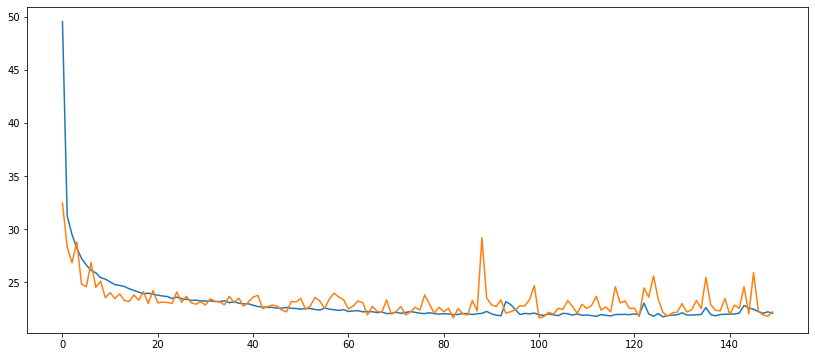

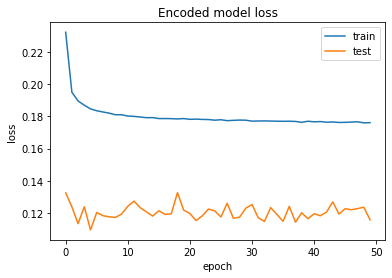

Overall accuracy of Convolutional Neural Network model: 0.9879564606741573


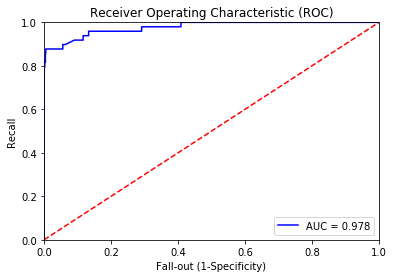

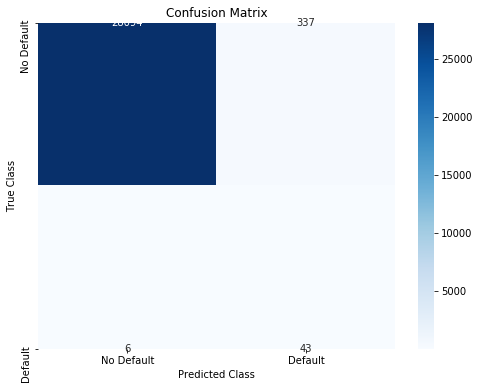

AUC(ROC): 0.9328488808206621
Precision: 0.11315789473684211
Recall: 0.8775510204081632
F1 score: 0.20046620046620048
False positives: 337
True positives: 43
False negatives: 6
True negatives: 28094
Fold #9
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_73 (Dense)                (None, 27)           837         input_17[0][0]                   
__________________________________________________________________________________________________
batch_normalization_89 (BatchNo (None, 27)           108         dense_73[0][0]                   
____________________________________________________________________________________

Epoch 58/150
511768/511768 [==============================] - 26s 51us/step - loss: 14.2538 - rec_loss: 22.7339 - kl_loss: 4.5894 - val_loss: 12.5615 - val_rec_loss: 21.7855 - val_kl_loss: 2.8839
Epoch 59/150
511768/511768 [==============================] - 26s 51us/step - loss: 14.4148 - rec_loss: 23.0678 - kl_loss: 4.5836 - val_loss: 13.1560 - val_rec_loss: 22.8456 - val_kl_loss: 2.9941
Epoch 60/150
511768/511768 [==============================] - 26s 51us/step - loss: 14.6150 - rec_loss: 23.4339 - kl_loss: 4.6086 - val_loss: 13.2131 - val_rec_loss: 22.8731 - val_kl_loss: 3.0467
Epoch 61/150
511768/511768 [==============================] - 26s 51us/step - loss: 14.4423 - rec_loss: 23.0921 - kl_loss: 4.5955 - val_loss: 12.8718 - val_rec_loss: 22.1889 - val_kl_loss: 3.0688
Epoch 62/150
511768/511768 [==============================] - 26s 51us/step - loss: 14.4272 - rec_loss: 23.0575 - kl_loss: 4.6028 - val_loss: 12.9380 - val_rec_loss: 22.4211 - val_kl_loss: 2.9442
Epoch 63/150
511768/

Epoch 100/150
511768/511768 [==============================] - 26s 51us/step - loss: 14.6692 - rec_loss: 23.1290 - kl_loss: 4.7499 - val_loss: 14.2073 - val_rec_loss: 24.1421 - val_kl_loss: 3.3625
Epoch 101/150
511768/511768 [==============================] - 26s 51us/step - loss: 14.8166 - rec_loss: 23.3748 - kl_loss: 4.7679 - val_loss: 13.4445 - val_rec_loss: 22.8682 - val_kl_loss: 3.1446
Epoch 102/150
511768/511768 [==============================] - 26s 51us/step - loss: 14.6088 - rec_loss: 23.0007 - kl_loss: 4.7517 - val_loss: 13.6074 - val_rec_loss: 23.1731 - val_kl_loss: 3.1722
Epoch 103/150
511768/511768 [==============================] - 26s 51us/step - loss: 14.7462 - rec_loss: 23.2994 - kl_loss: 4.7452 - val_loss: 13.3812 - val_rec_loss: 22.6875 - val_kl_loss: 3.2245
Epoch 104/150
511768/511768 [==============================] - 26s 51us/step - loss: 14.6598 - rec_loss: 23.0939 - kl_loss: 4.7614 - val_loss: 13.8567 - val_rec_loss: 23.5821 - val_kl_loss: 3.2571
Epoch 105/150
5

Epoch 42/50
511768/511768 [==============================] - 94s 184us/step - loss: 0.1762 - accuracy: 0.9347 - val_loss: 0.1192 - val_accuracy: 0.9848
Epoch 43/50
511768/511768 [==============================] - 94s 184us/step - loss: 0.1762 - accuracy: 0.9346 - val_loss: 0.1175 - val_accuracy: 0.9833
Epoch 44/50
511768/511768 [==============================] - 94s 184us/step - loss: 0.1760 - accuracy: 0.9346 - val_loss: 0.1228 - val_accuracy: 0.9840
Epoch 45/50
511768/511768 [==============================] - 94s 184us/step - loss: 0.1763 - accuracy: 0.9345 - val_loss: 0.1172 - val_accuracy: 0.9835
Epoch 46/50
511768/511768 [==============================] - 94s 184us/step - loss: 0.1758 - accuracy: 0.9346 - val_loss: 0.1152 - val_accuracy: 0.9854
Epoch 47/50
511768/511768 [==============================] - 95s 185us/step - loss: 0.1760 - accuracy: 0.9345 - val_loss: 0.1244 - val_accuracy: 0.9825
Epoch 48/50
511768/511768 [==============================] - 96s 187us/step - loss: 0.17

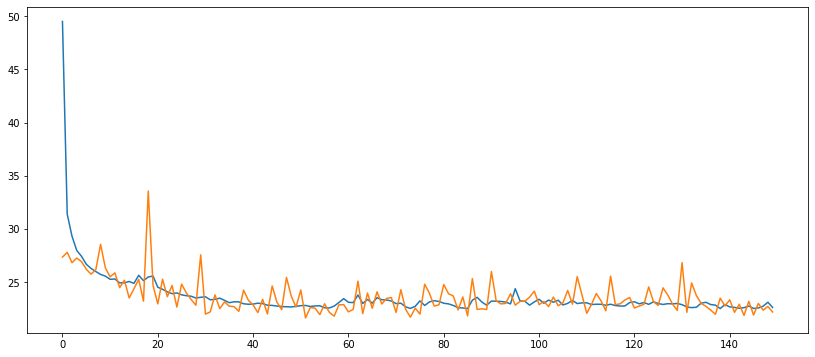

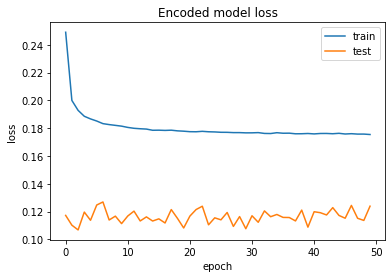

Overall accuracy of Convolutional Neural Network model: 0.9844452247191011


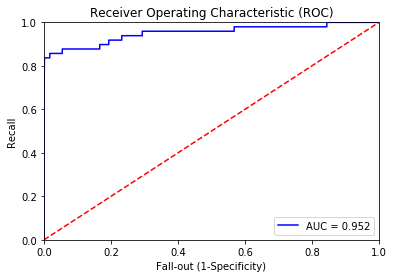

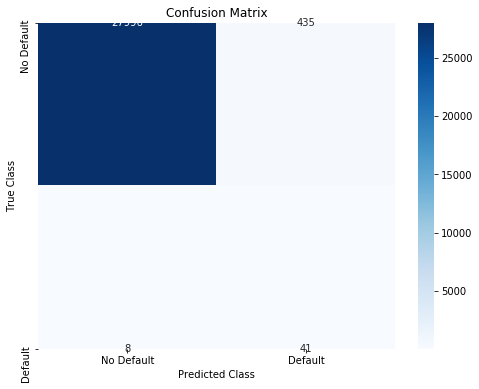

AUC(ROC): 0.9107172466960827
Precision: 0.0861344537815126
Recall: 0.8367346938775511
F1 score: 0.15619047619047619
False positives: 435
True positives: 41
False negatives: 8
True negatives: 27996
Fold #10
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_82 (Dense)                (None, 27)           837         input_19[0][0]                   
__________________________________________________________________________________________________
batch_normalization_100 (BatchN (None, 27)           108         dense_82[0][0]                   
____________________________________________________________________________________

Epoch 58/150
511768/511768 [==============================] - 26s 51us/step - loss: 15.3906 - rec_loss: 24.6773 - kl_loss: 4.6422 - val_loss: 13.4334 - val_rec_loss: 23.4108 - val_kl_loss: 2.7793
Epoch 59/150
511768/511768 [==============================] - 26s 51us/step - loss: 15.2951 - rec_loss: 24.5117 - kl_loss: 4.6490 - val_loss: 13.3525 - val_rec_loss: 23.1577 - val_kl_loss: 2.8810
Epoch 60/150
511768/511768 [==============================] - 26s 51us/step - loss: 15.2284 - rec_loss: 24.3901 - kl_loss: 4.6259 - val_loss: 13.2099 - val_rec_loss: 22.8837 - val_kl_loss: 2.8573
Epoch 61/150
511768/511768 [==============================] - 26s 51us/step - loss: 15.1614 - rec_loss: 24.3517 - kl_loss: 4.5829 - val_loss: 13.8846 - val_rec_loss: 24.2264 - val_kl_loss: 2.8771
Epoch 62/150
511768/511768 [==============================] - 26s 51us/step - loss: 15.0873 - rec_loss: 24.2457 - kl_loss: 4.5660 - val_loss: 13.1274 - val_rec_loss: 22.8356 - val_kl_loss: 2.7910
Epoch 63/150
511768/

Epoch 100/150
511768/511768 [==============================] - 26s 50us/step - loss: 14.2892 - rec_loss: 22.8850 - kl_loss: 4.5392 - val_loss: 13.0296 - val_rec_loss: 22.7175 - val_kl_loss: 2.7815
Epoch 101/150
511768/511768 [==============================] - 26s 50us/step - loss: 14.2492 - rec_loss: 22.8212 - kl_loss: 4.5423 - val_loss: 13.0680 - val_rec_loss: 22.9203 - val_kl_loss: 2.6716
Epoch 102/150
511768/511768 [==============================] - 26s 50us/step - loss: 14.8390 - rec_loss: 23.8729 - kl_loss: 4.5990 - val_loss: 13.0192 - val_rec_loss: 22.7660 - val_kl_loss: 2.6510
Epoch 103/150
511768/511768 [==============================] - 26s 50us/step - loss: 14.7376 - rec_loss: 23.6732 - kl_loss: 4.5583 - val_loss: 13.3208 - val_rec_loss: 23.3702 - val_kl_loss: 2.7211
Epoch 104/150
511768/511768 [==============================] - 26s 50us/step - loss: 14.2676 - rec_loss: 22.8943 - kl_loss: 4.5056 - val_loss: 13.3561 - val_rec_loss: 23.2104 - val_kl_loss: 2.9584
Epoch 105/150
5

Epoch 42/50
511768/511768 [==============================] - 93s 182us/step - loss: 0.1792 - accuracy: 0.9316 - val_loss: 0.1222 - val_accuracy: 0.9699
Epoch 43/50
511768/511768 [==============================] - 93s 182us/step - loss: 0.1790 - accuracy: 0.9316 - val_loss: 0.1209 - val_accuracy: 0.9686
Epoch 44/50
511768/511768 [==============================] - 94s 183us/step - loss: 0.1791 - accuracy: 0.9315 - val_loss: 0.1221 - val_accuracy: 0.9740
Epoch 45/50
511768/511768 [==============================] - 94s 183us/step - loss: 0.1789 - accuracy: 0.9319 - val_loss: 0.1166 - val_accuracy: 0.9761
Epoch 46/50
511768/511768 [==============================] - 93s 182us/step - loss: 0.1791 - accuracy: 0.9318 - val_loss: 0.1323 - val_accuracy: 0.9676
Epoch 47/50
511768/511768 [==============================] - 93s 183us/step - loss: 0.1794 - accuracy: 0.9315 - val_loss: 0.1283 - val_accuracy: 0.9725
Epoch 48/50
511768/511768 [==============================] - 93s 182us/step - loss: 0.17

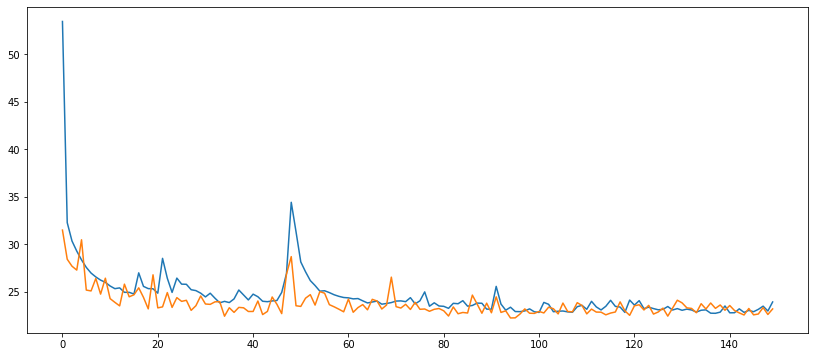

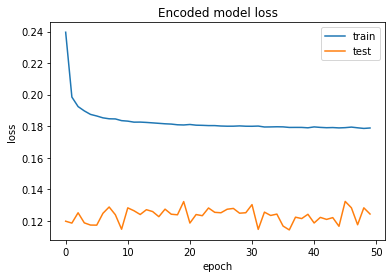

Overall accuracy of Convolutional Neural Network model: 0.969627808988764


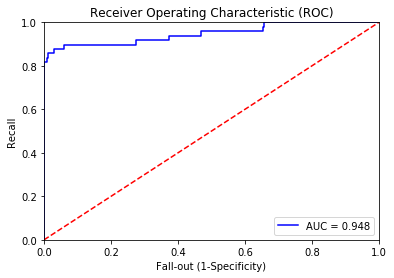

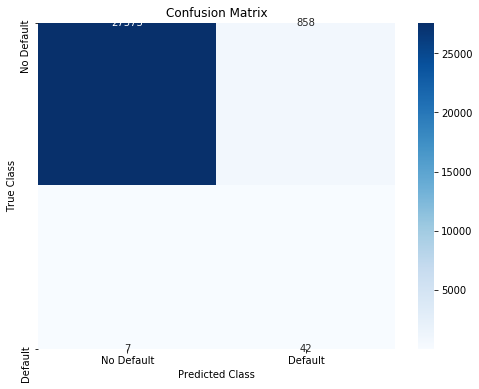

AUC(ROC): 0.9134822653341172
Precision: 0.04666666666666667
Recall: 0.8571428571428571
F1 score: 0.08851422550052689
False positives: 858
True positives: 42
False negatives: 7
True negatives: 27573


In [6]:
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
#encoding_dim_4 = 20
#encoding_dim_5 = 18
hidden_dim = 15 #size of the hidden layer in encoder and decoder
latent_dim = 2 #number of latent variables to learn
learning_rate = 1e-3

#Cross_Validate

kf = StratifiedKFold(10, shuffle = True, random_state=42) # Use for Kfold Validation

tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)
    

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = SMOTE(random_state=2)
    X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    

    input_dim = X_res_train.shape[1]
    x = input_dim

    input_layer = Input(shape=(input_dim,))

    encoder = Dense(encoding_dim_1, activation='tanh',activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_2, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_3, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_4, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_5, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    encoder = Dense(hidden_dim, activation='tanh' , name='encoder_hidden')(encoder)
    encoder = BatchNormalization()(encoder)

    z_mean = Dense(latent_dim, name='z_mean')(encoder)
    z_log_var = Dense(latent_dim, name='z_log_var')(encoder)
    
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling, name='z_sampled')([z_mean, z_log_var])
    t = BatchNormalization()(z)

    decoder1 = Dense(hidden_dim, activation='tanh')(t)
    decoder1 = BatchNormalization()(decoder1) 

    #decoder = Dense(encoding_dim_5, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    #decoder = Dense(encoding_dim_4, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_3, activation='tanh')(decoder1)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_2, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_1, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)


    decoded_mean = Dense(input_dim, activation=None, name='decoded_mean')(decoder)


    vae = Model(inputs=input_layer, outputs=decoded_mean)
    
    def rec_loss(y_true, y_pred):
        return K.sum(K.square(y_true - y_pred), axis=-1)

    def kl_loss(y_true, y_pred):
        return - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    def vae_loss(x, decoded_mean):
        rec_loss = K.sum(K.square(x - decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean((rec_loss + kl_loss) / 2)

    vae.compile(optimizer=RMSprop(lr=learning_rate), loss=vae_loss, metrics=[rec_loss, kl_loss])
    vae.summary()
    
    n_epochs = 150
    batch_size = 128

#early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1e-5) #stop training if loss does not decrease with at least 0.00001
#reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, min_delta=1e-5, factor=0.2) #reduce learning rate (divide it by 5 = multiply it by 0.2) if loss does not decrease with at least 0.00001

#callbacks = [reduce_lr]

#collect training data in history object
    history = vae.fit(X_res_train, X_res_train, 
                  validation_data=(x_test, x_test),
                  batch_size=batch_size,
                  shuffle = True,
                  epochs=n_epochs,
                  )
    
    
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    ax.plot(history.history['rec_loss']);
    ax.plot(history.history['val_rec_loss']);
    
    
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, decoder1)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(X_res_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape
    
    #--------------------------------Build new model using encoded data--------------------------

    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train_res, epochs=50,validation_data=(encoded_test_x, y_test), verbose=1)

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    

        #---------------------------------Predictions and visuallizations-----------------------#Predict on test set
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    

    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)
    

      

In [7]:

print("Average tn = " + str(Average(tn_summary)))
print("Average fp = " + str(Average(fp_summary)))
print("Average fn = "+ str(Average(fn_summary)))    
print("Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print("Average Precision = {:0.2f}%".format(Average_precision*100))

print("Average Recall = {:0.2f}%".format(Average_recall*100))

print("Average F1 score = {:0.2f}%".format(Average_f1_score*100))

Average tn = 27948.8
Average fp = 482.7
Average fn = 6.4
Average tp = 42.8
Average Precision = 8.14%
Average Recall = 86.99%
Average F1 score = 14.89%


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print("Total fp: " + str(total_fp))
print(" Total fn:" + str(total_fn))
print(" Total tp:" + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print("Total Precision = " + str(Total_Precision))
print("Total Recall = " + str(Total_Recall))
print("Total F1_score = " + str(Total_F1_score))
    


 Total tn: 279488
Total fp: 4827
 Total fn:64
 Total tp:428
Total Precision = 0.08144624167459562
Total Recall = 0.8699186991869918
Total F1_score = 0.1489472768400905
